In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
img = cv2.imread('data/giemsa_raw.BMP')
print(img.shape)

(896L, 1017L, 3L)


In [13]:
def show_image(image, name='image'):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show_histogram(image):
    plt.hist(image.ravel(),256,[0,256]), plt.show()

def histogram_equalization(image):
    equ = cv2.equalizeHist(image)
    return equ

def connected_components(gray):
    binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # getting mask with connectComponents
    ret, labels = cv2.connectedComponents(binary)
    for label in range(1,ret):
        mask = np.array(labels, dtype=np.uint8)
        mask[labels == label] = 255
        cv2.imshow('component',mask)
        cv2.waitKey(0)

    # getting ROIs with findContours
    contours = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]
    for cnt in contours:
        (x,y,w,h) = cv2.boundingRect(cnt)
        ROI = image[y:y+h,x:x+w]
        cv2.imshow('ROI', ROI)
        cv2.waitKey(0)

    cv2.destroyAllWindows()
def connected_components_2(gray):
    binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    ret, labels = cv2.connectedComponents(255 - binary)

    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    plt.imshow(labeled_img)
    show_image(labeled_img)

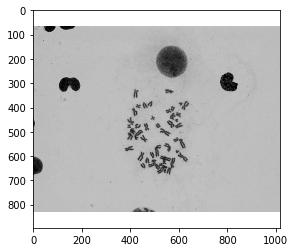

In [7]:
# Step 1: Convert image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, 'gray')

In [8]:
# # Histogram
normalized_image = histogram_
show_histogram()

In [9]:
# # Canny Edge Detection
# edges = cv2.Canny(gray,100,200)
# plt.imshow(edges, cmap='gray')

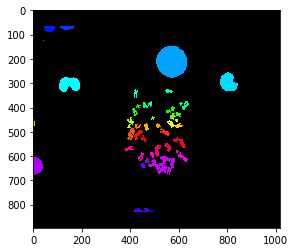

In [14]:
# Connected components
# connected_components_2(gray)

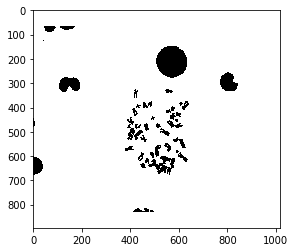

In [15]:
# Otsu's method without noise filtering
ret1, th1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite("data/giemsa_raw_thresholded.BMP", th1)
plt.imshow(th1, 'gray')

In [18]:
# Coutours
im2, contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_with_contours = cv2.drawContours(gray, contours, -1, (0,255,0), 3)
show_image(image_with_contours)

(<matplotlib.figure.Figure at 0x13b62be0>,
 <matplotlib.image.AxesImage at 0x13d63550>)

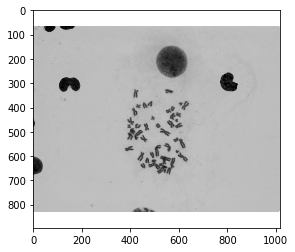

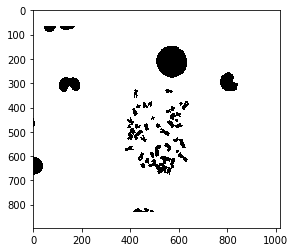

In [21]:
# Otsu's method with noise filtering
blur = cv2.GaussianBlur(gray,(5,5),0)
median = cv2.medianBlur(gray,5)
ret2, th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Show multiple images 
plt.figure(), plt.imshow(median, 'gray')
cv2.imwrite("data/giemsa_raw_filtered.BMP", median)
plt.figure(), plt.imshow(th2, 'gray')